## Zhlukovanie

V nasledujúcichj príkladoch si na ukážkových demonštračných úlohách popíšeme spôsom práce so zhlukovacími modelmi v knižnici Scikit-learn. V týchto úlohách budeme používať buď vygenerované, alebo zjednodušené dáta tak, aby výstupy bolo dobre možné vizualizovať grafmi (dátové množiny teda budú obsahovať iba 2 atribúty, aby sme ich mohli vykresliť - v praxi zriedkavé).

Príklady demonštrujú použitie:
* k-stredových metód
* na mriežke/hustote založených metód
* hierarchického zhlukovania

### K-stredové metódy

Pre ukážku použitia a demonštráciu fungovania k-stredových metód zvolíme metódu K-Means (parametre a nastavenie metódy bude popísané nižšie). 

Najprv importujeme knižnice, s ktorými budeme pracovať. Budeme potrebovať aj Seaborn a matplotlib pre vykresľovanie výstupov a numpy pre prácu s poľami. 

In [1]:
import matplotlib.pyplot as plt # importujeme matplotlib pre vykresľovanie
import seaborn as sns; sns.set() # importujeme seaborn pre pokročilejšie vizualizácie a nastavíme prostredie
import numpy as np # importujeme numpy pre prácu s poľami

# nastavíme vykresľovanie vizualizácií v Jupyter notebookoch
%matplotlib inline 

Teraz si pripravíme dáta pre demonštráciu tejto metódy. Na ukážku fungovania K-Means si vygenerujeme ukážkové syntetické dáta s dvoma numerickými atribútmi. Na vygenerovanie dát použijeme funkciu `make_blobs` z generátora príkladov knižnice Scikit-learn (`samples_generator`). Tá slúži práve na vytváranie ukážkových datasetov so špecifickým rozdelením. Funkcia `make_blobs` teda vytvorí definovaný počet dátových bodov (`n_samples`) v rozmiestnených v štyroch zhlukoch (`centers`). Rovnako vieme definovať, ako "husto" sa majú vygenerované body v okolí centier nagenerovať (`cluster_std`). Výstupom z funkcie sú numpy polia, ktoré zodpovedajú matici príznakov a vektora cieľového atribútu (ktorý tentoraz predstavuje príslušnosť do zhluku).
Výstupom z funkcie je matica príznakov (numpy array) a vektor hodnôt cieľového atribútu. Ten v tomto prípade reprezentuje skutočné zaradenie príkladu do zhluku. Pri samotnom vytváraní zhlukovacích modelov sa nepoužíva (v praxi častokrát ani nie sú skutočné hodnoty k dispozícii). Ak sú (napr. vyjadrenie experta atď.), potom je možné tieto hodnoty použiť pre vyjadrenie kvality vytvorených zhlukov (ukážka bude súčasťou ďalšej lekcie).

In [2]:
from sklearn.datasets.samples_generator import make_blobs # importujeme funkciu pre generátor dát

# vygenerujeme 300 záznamov s definovaným rozdelením
# v štyroch skupinkách, s definovanou odchýlkou od centier
blobs, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) ##numpy polia

# výstupom je matica príznakov príkladov (blobs) a vektor skuočných hodnôt príslušnosti k zhluku y_true
# blobs a y_true sú numpy polia
# vypíšeme si jeden záznam z vygenerovaných dátových bodov
print(blobs[:1]) 

[[0.83685684 2.13635938]]


Vygenerované dáta môžeme jednoducho zobraziť pomocou Seaborn knižnice. Keďže máme dáta popísané dvoma numerickými atribútmi, môžeme na vizualizáciu použit `scatterplot`. Ten pracuje jak s pandas dátovými rámcami, tak s numpy poliami, preto mu definujeme ako parametre jednotlivé stĺpce vstupného numpy polia. 

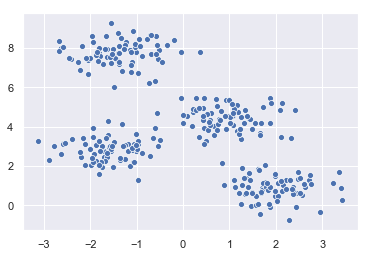

In [3]:
# scatterplotom vykreslíme body - 
# na x-ovú os stĺpec s indexom 0
# na y-ovú os stĺpec s indexom 1
g = sns.scatterplot(x=blobs[:, 0], y=blobs[:, 1]) 

Teraz skúsime vytvoriť model KMeans z knižnice Scikit-learn. 

Spôsob tvorby modelov je veľmi podobný s tvorbou klasifikačných modelov pomocou tejto knižnice. Rovnakým spôsobom najprv naimportujeme potrebnú knižnicu, inicializujeme model s definovanými parametrami, natrénujeme model na vstupných dátach pomocou funkcie `fit`. Na zatriedenie príkladov do daného zhluku potom môžeme použiť funkciu `predict`, ktorej výstupom tentoraz bude predpovedanie zhluku, do ktorého daný objekt/objekty patrí/patria. Rozdiel je teda v tom, že (keďže sa jedná o zhlukovanie - nekontrolované učenie) nepracujeme s údajmi o hodnote cieľového atribútu, keďže neexistuje. Funkcie pri tvorbe zhlukovacích modelov teda pri trénovaní (`fit`) a predpovedaní (`predict`) používajú len maticu príznakov, bez vektora hodnôt cieľového atribútu. 

Povinným parametrom algoritmu K-Means je počet zhlukov, ktoré hľadáme. Ten je definovaný hodnotou parametra `n_clusters`. 

Príklad nižšie vytvorí model K-Means na vygenerovaných dátach. Vzhľadom na štruktúru vygenerovaných dát, skúsime natrénovať model K-Means pre 4 zhluky. V ďalšom kroku potom použijeme funkciu `predict` na trénovacích dátach -  chceme všetky príklady z dátovej množiny zatriediť do vytvorených zhlukov, aby sme výsledky zhlukovania mohli prehľadne vizualizovať. Rovnako z vytvoreného modelu pomocou `cluster_centers_` môžeme dostať buď jednotlivé, alebo všetky centroidy. 

In [4]:
from sklearn.cluster import KMeans # najprv importujeme potrebnú knižnicu, v tomto prípade KMeans pre daný model

kmeans = KMeans(n_clusters=4) # inicializujeme K-Means model, hodnotu parametra K - počet zhlukov - nastavíme na 4
kmeans.fit(blobs) # natrénujeme model na vstupných dátach
y_kmeans = kmeans.predict(blobs) # zatriedime všetky dáta do vytvorených zhlukov

centers = kmeans.cluster_centers_ # do premennej centers načítame centroidy vytvorených zhlukov

print("Vsetky centroidy:") # vypíšeme centroidy pre všetky zhluky 
print(centers)

Vsetky centroidy:
[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]]


Ak by sme chceli zatriediť neznámy príklad do jedného zo zhlukov, použijeme taktisto funkciu `predict`. Ako jej parameter musíme zadať príklad, transformovaný do numpy poľa (v rovnakej forme ako trénovacie dáta). Potom pomocou funkcie `precict` získame identifikátor zhluku, do ktorého model zatrieďuje neznámy príklad. 

In [5]:
 # vytvoríme si ukážkový príklad a transformujeme ho do numpy poľa v požadovanom tvare (1 riadok, 2 stĺpce)
x = np.array([1.98686, 3.76876]).reshape(1, 2)

prediction = kmeans.predict(x) # odpredikujeme jeho príslušnosť do zhluku kmeans modelu
print(prediction) # vypíšeme výstup na obrazovku

[3]


V tomto ukážkovom prípade, keďže pracujeme s dvoma atribútmi, môžeme pomocou knižnice Seaborn vytvorené zhluky a ich centroidy aj názorne vizualizovať. Použijeme teda zatriedené trénovacie dáta (`blobs` a zhluky, do ktorých spadajú `y_kmeans`)  a vypočítané centroidy (`centers`). Vykreslíme teda do jedného grafu 2 scatter plot vizualizácie:
* prvým vykreslíme dátové body farebne rozlíšené podľa zhlukov
* druhým centrá zhlukov
V oboch prípadoch na X-ovú a Y-ovú os vynesieme hodnoty prvého, resp. druhého stĺpca (prvého a druhého atribútu) dát, resp. centrodiov.

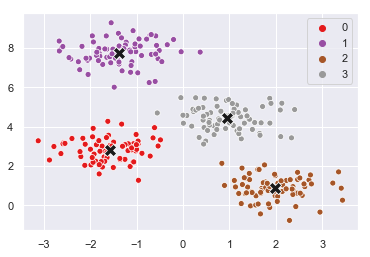

In [7]:
# vykreslíme prvý scatterplot - X a Y os zodpovedá prvému, resp. druhému stĺpcu v dátovom poli
# jednotlivé body chceme farebne rozlíšiť podľa zhlukov (príslušnosť k zhlukom máme v y_kmeans)
# nastavíme farebnú paletu na Set1 
g=sns.scatterplot(x=blobs[:, 0], y=blobs[:, 1], hue=y_kmeans, palette="Set1") ###y_means - to co model predpovedal

# do vytvorenej vizualizácie vykreslíme ešte aj centroidy, rovnako scatterplotom, keďže majú rovnakú štruktúru ako vstupné dáta
# vykreslíme objekty poľa centers (súradnice sú oba stĺpce)
# parametrom s nastavíme veľkosť bodov (centrody chceme trocha zvýrazniť)
# definujeme farbu a parametrom marker aj spôsob vykreslenia
g=sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=150, color=".1", marker="X") ##s je size, nech ich vidno

Teraz si ukážeme, čo sa stane, ak nezvolíme správnu hodnotu parametra `k`. Vytvoríme model so 6 zhlukmi, rovnakým spôsobom zatriedime príklady zo vstupnej množiny do vytvorených zhlukov a vizualizujeme scatter plotom štruktúru zhlukov. 

Toto demonštruje potrebu správnej voľby parametra pri zhlukovaní, 

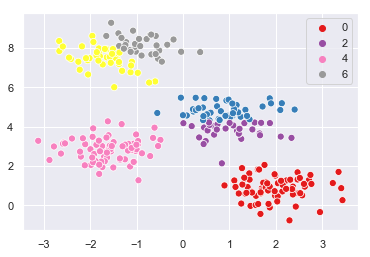

In [10]:
# vytvoríme nový model, tentoraz pre 6 zhlukov
kmeans2 = KMeans(n_clusters=6) ##vyskusaj 2 - tiez nespravne - poddimenzovane

kmeans2.fit(blobs) # natrénujeme model na vstupných dátach
y_kmeans2 = kmeans2.predict(blobs) # použijeme model pre priradenie dát do vytvorených zhlukov

# vykreslíme scatterplotom dáta, farebne rozlíšené podľa zhlukov
g = sns.scatterplot(x=blobs[:, 0], y=blobs[:, 1], hue=y_kmeans2, s=50, palette='Set1') 

### Zhlukovanie založené na mriežke alebo hustote

Ako sme si povedali, k-stredové metódy niekedy nie sú vhodné tam, kde nepredpokladá, že objekty sú v sférických zhlukoch. Vtedy je vhodné použiť iný typ zhlukovania, napr. založené na mriežke alebo hustote. Príklad nižšie demonštruje na ukážkových vygenerovaných dátach, aké problémy môže K-Means mať a ako sa s nimi dá vysporiadať iným modelom. 

Pre túto úlohu si opäť vygenerujeme dáta špecifického tvaru. Nebudeme tentoraz generovať "kôpky" dátových bodov ale pomocou funkcie `make_moons` dáta zoskupené v dvoch rozmeroch v tvare polmesiacov. Porobným spôsobom ako v predošlom príklade vieme definovať koľko dátových bodov takto chceme vytvoriť a s akým šumom. 

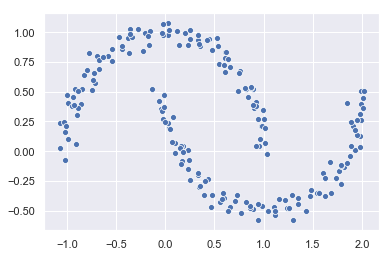

In [11]:
from sklearn.datasets import make_moons # importujeme potrebnú knižnicu pre generovanie datasetu

# vygenerujeme vstupné dáta
# 200 príkladov
moon_data, y_true = make_moons(200, noise=.05, random_state=0)

# moon_data opäť obsahuje numpy pole príkladov popísaných 2 atribútmi a y_true skutočnú hodnotu príslušnosti do zhluku

# opäť pomocou scatter plot-u vykreslíme vygenerované dáta
# na x-ovú os prvý stĺpec a na y-ovú os druhý
sns.scatterplot(x=moon_data[:, 0], y=moon_data[:, 1]) 

Skúsime na takomto datasete natrénovať K-Means model a uvidíme, ako si poradí s vytáraním zhlukov na takýchto dátach. 

In [12]:
# inicializujeme K-Means model, pre 2 zhluky
kmeans_moons = KMeans(n_clusters=2) 
kmeans_moons.fit(moon_data) # natrénujeme model na vstupných dátach
labels = kmeans_moons.predict(moon_data) # vstupné dáta priradíme do zhlukov

A teraz môžeme vizualizovať, ako si K-Means poradil s takto tvarovanými dátami - vizualizujeme priradenia pomocou Scatter plotu. 

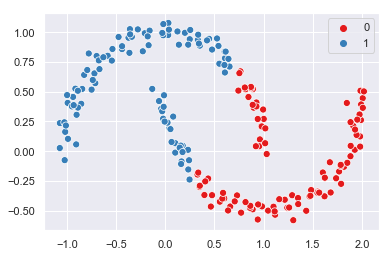

In [13]:
# pomocou scatter plotu vykreslíme dátové body
# farebne odlíšime podľa príslušnosti do zhlukov (labels)


# YOUR CODE HERE
g =sns.scatterplot(x=moon_data[:, 0], y=moon_data[:, 1], hue=labels, s=50, palette='Set1')

Z výstupu vidíme, že K-Means v takto štruktúrovanych dátach nedokáže dobre identifikovať zhluky. 

Vyskúšame teda použit iný typ metódy a to metódu založenú na hustote, ktorá by mala byť schopná detegovať aj zhluky iných ako sférických tvarov. 
Použijeme metódu DBSCAN z knižnice Scikit-learn, ktorú rovnakým spôsobom natrénujeme na vstupných dátach. Jej parametrom je hodnota `eps` - najväčšia vzdialenosť medzi dvoma príkladmi, pre ktorú sa ešte považujú za príklady z rovnakého okolia. DBSCAN model v Scikit-learn má implementovanú funkciu `fit_predict` ktorá model natrénuje a vstupným dátam hneď priradí hodnotu zhluku do ktorého patria. 

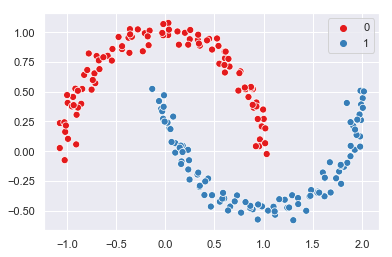

In [18]:
from sklearn.cluster import DBSCAN # importujeme potrebné knižnice

dbscan = DBSCAN(eps=0.3) # inicializujeme DBSCAN model pre definovanú hodnotu minimálnej vzdialenosti

labels = dbscan.fit_predict(moon_data) # natrénujeme model na vstupných dátach a dáta priradíme do zhlukov

# pomocou scatter plotu vykreslíme dátové body a farebne odlíšime podľa príslušnosti do zhlukov
sns.scatterplot(x=moon_data[:, 0], y=moon_data[:, 1], hue=labels, s=50, palette='Set1')

### Hierarchické zhlukovanie

Teraz si ukážeme príklad hierarchického aglomeratívneho zhlukovania. Použijeme dáta z prvej úlohy. 

Najprv si na týchto dátach vykreslíme dendrogram - hierarchiu zhlukov - pomocou funkcie `dendrogram` z knižnice Scipy. Pre jeho vykreslenia najprv musíme vytvoriť jeho štruktúru. Funkcia `linkage` vytvára hierarchický zhlukovací model, ktorý môžeme použiť na vykreslenie dendrogramu. Pre funkciu špecifikujeme vstupné dáta a algoritmus spájania zhlukov (parameter `method`). 

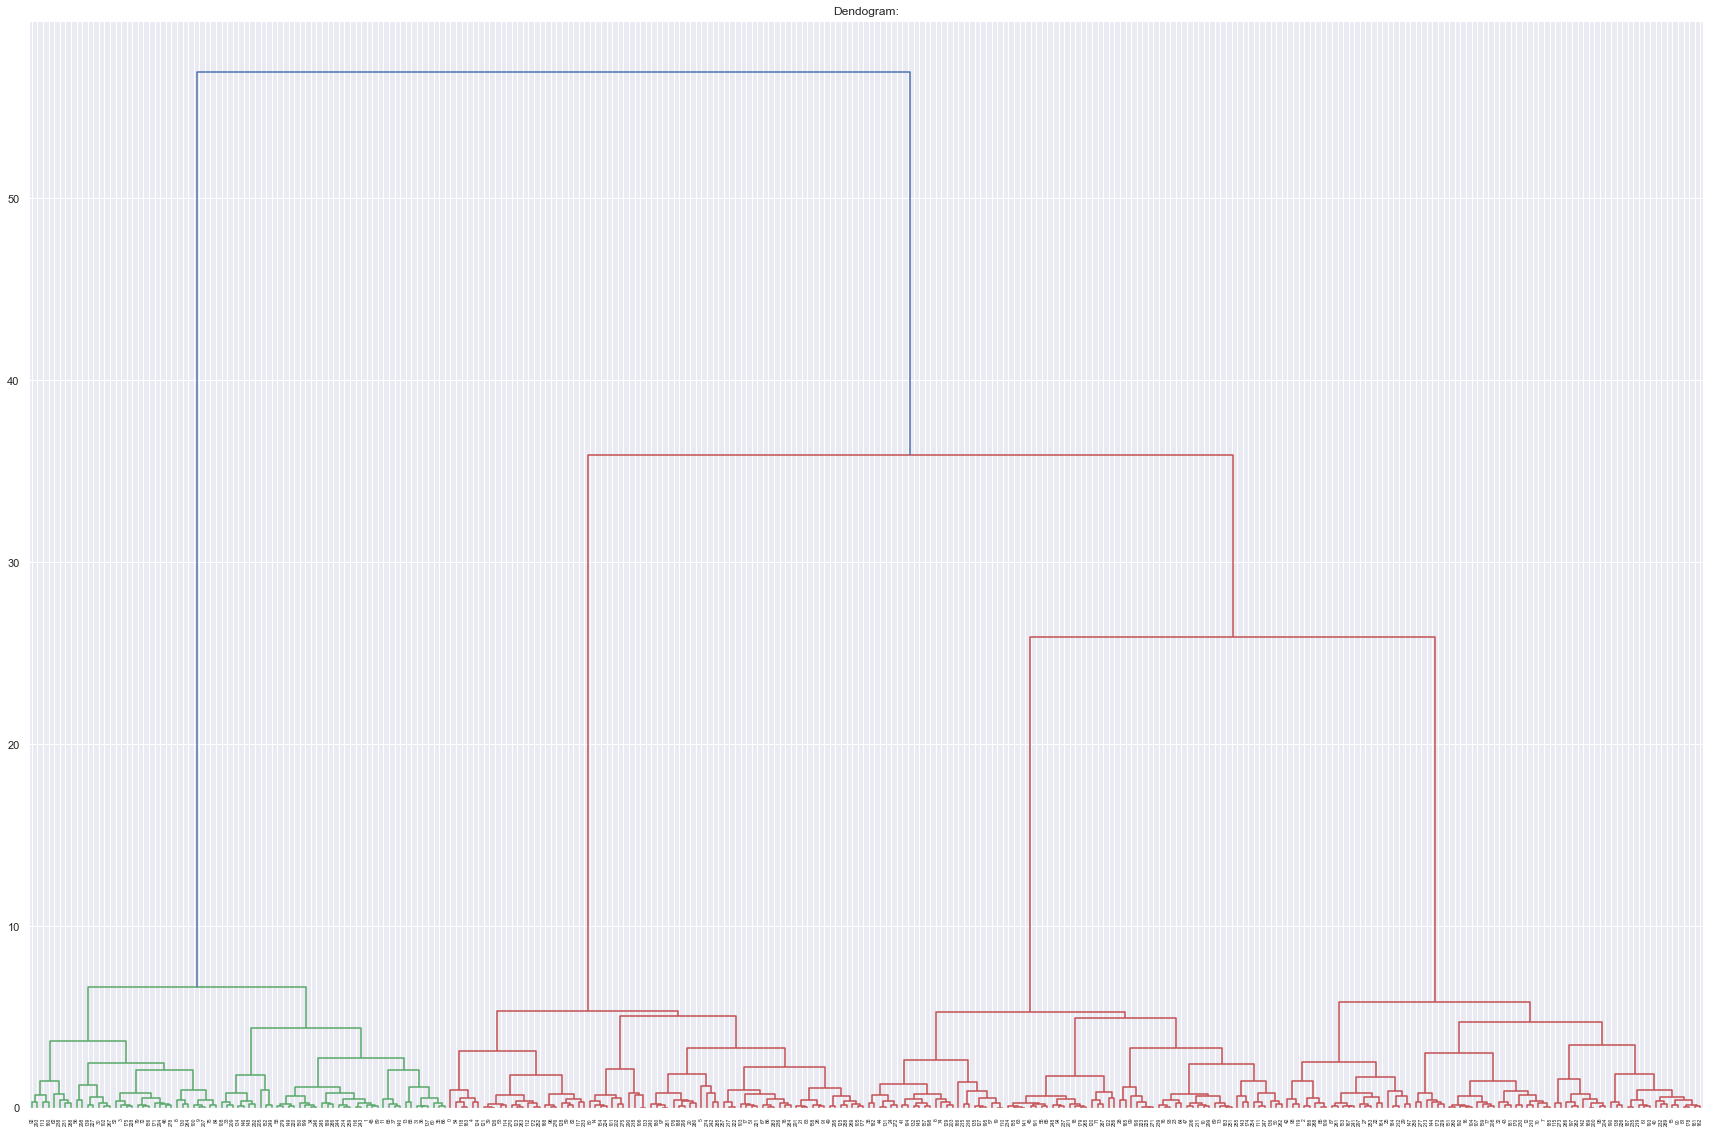

In [19]:
import scipy.cluster.hierarchy as shc # importujeme potrebné knižnice

plt.figure(figsize=(30, 20))  # nastavíme veľkosť vykresľovaného obrázku
plt.title("Dendogram:")  # vypíšeme jeho názov
links = shc.linkage(blobs, method='ward') # vytvoríme hierarchický model zhlukov

dend = shc.dendrogram(links) # vykreslíme dendrogram

Takto vizualizujeme štruktúru dendrogramu. Potom môžeme vytvoriť aglomeratívny model pre definovaný počet zhlukov pomocou Scikit-learn, ktorý bude zodpovedať určitej úrovni hierarchie dendrogramu. 

In [20]:
from sklearn.cluster import AgglomerativeClustering # importujeme potrebné knižnice
aggcl = AgglomerativeClustering(n_clusters=5) # nastavíme parametre a definovaný počet zhlukov (kde sa aglomeratívny model "zastaví")
labels_agg = aggcl.fit_predict(blobs) # natrénujeme model

Model potom môžeme rovnakým spôsobom vizualizovať pomocou Seaborn knižnice. 

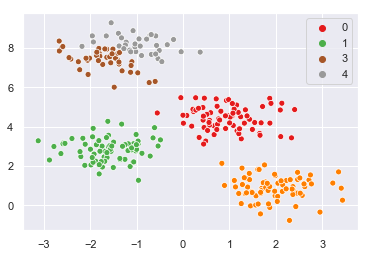

In [21]:
sns.scatterplot(x=blobs[:,0], y=blobs[:,1], hue=labels_agg, palette='Set1')  